In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
mbti_df=pd.read_csv('/Users/nayoneekapaul/Documents/CODECLAUSE/Personality_prediction/mbti_1.csv')

In [3]:
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


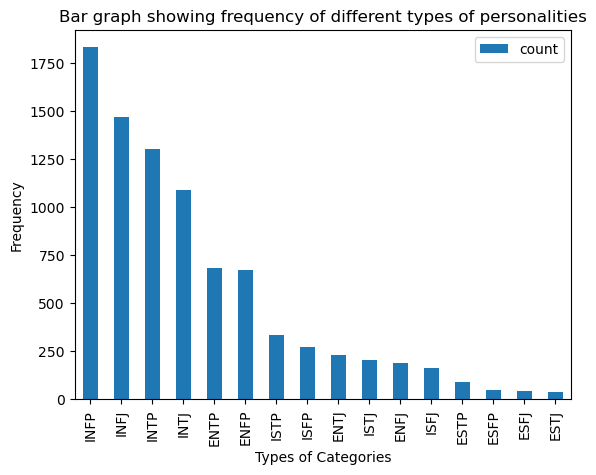

In [5]:
pd.DataFrame(mbti_df.type.value_counts()).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Types of Categories')
plt.title('Bar graph showing frequency of different types of personalities')
plt.show()

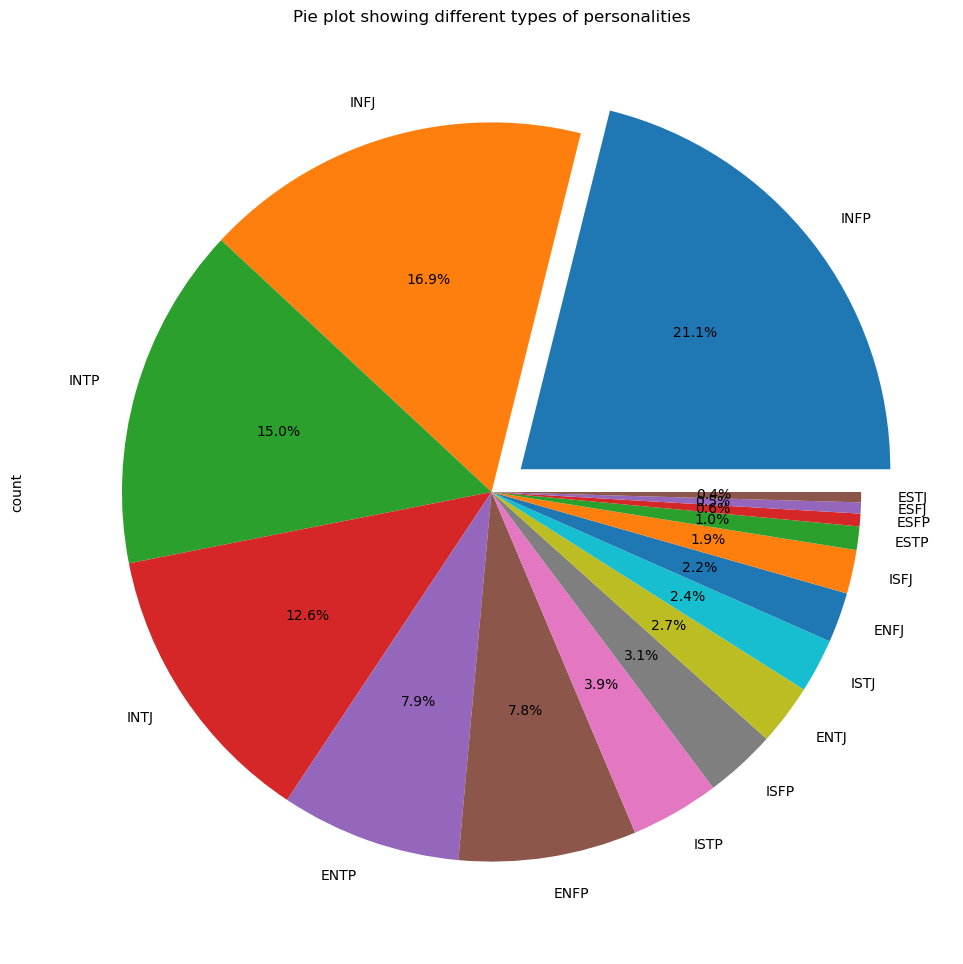

In [6]:
mbti_df.type.value_counts().plot(kind='pie',figsize=(12,12), autopct='%1.1f%%', explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.title('Pie plot showing different types of personalities')
plt.show()

/var/folders/sx/t9vt37b513136n47lyz7nc9w0000gn/T/ipykernel_35278/70030955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mbti_df["posts"].apply(len))


Text(0.5, 1.0, 'Distribution of lengths of the post')

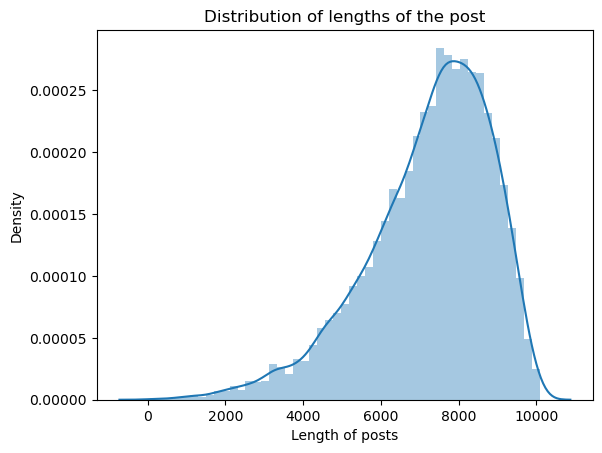

In [7]:
sns.distplot(mbti_df["posts"].apply(len))
plt.xlabel("Length of posts")
plt.ylabel("Density")
plt.title("Distribution of lengths of the post")

In [10]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(mbti_df,test_size=0.2,random_state=42,stratify=mbti_df.type)

In [11]:
print(test_data)

      type                                              posts
7814  INFP  'Macona , it depends if the big family has ext...
2233  ENFJ  https://www.youtube.com/watch?v=cfg4SC9Nics|||...
7261  INFJ  '@ Heylena.   Lol! Compliment accepted. Thank ...
7794  INFJ  '2pac right|||??? rocket coffin, like packed w...
2950  INTJ  'The title of this thread is misleading; there...
...    ...                                                ...
2006  INTJ  'One sentence is too restrictive to accurately...
7137  ISTJ  'I wanted to be like some odd hybrid of Dr. Ja...
6091  ENTP  'I just took the cognitive process test here, ...
2997  INFJ  'Don't get so caught up in a fantacy about you...
5458  ENTJ  'Doll i love all the movies you listed, and th...

[1735 rows x 2 columns]


In [12]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english')
vectorizer.fit(train_data.posts)
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [13]:
from sklearn.preprocessing import LabelEncoder
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

### Random Forest Classifier 

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model_rfc=RandomForestClassifier()
model_rfc.fit(train_post,train_target)
pred_rfc=model_rfc.predict(test_post)

In [16]:
pred_training_rfc=model_rfc.predict(train_post)

In [17]:
print("The train accuracy score for model trained on Random Forest Classifier is:",accuracy_score(train_target,pred_training_rfc))

The train accuracy score for model trained on Random Forest Classifier is: 1.0


In [18]:
print("The test acccuracy score for model trained on Random Forest Classifier is:",accuracy_score(test_target,pred_rfc))

The test acccuracy score for model trained on Random Forest Classifier is: 0.5561959654178674


In [19]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Random Forest Classifier\n',classification_report(test_target,model_rfc.predict(test_post),target_names=personality_types))

Test classification report of Random Forest Classifier
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.77      0.40      0.53       135
        ENTJ       0.50      0.02      0.04        46
        ENTP       0.72      0.38      0.50       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.58      0.71      0.64       294
        INFP       0.47      0.88      0.61       366
        INTJ       0.60      0.53      0.57       218
        INTP       0.58      0.70      0.64       261
        ISFJ       1.00      0.09      0.17        33
        ISFP       0.80      0.07      0.14        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.95      0.28      0.44        67

    accuracy            

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model_lr=LogisticRegression()
model_lr.fit(train_post,train_target)
pred_lr=model_lr.predict(test_post)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
pred_training_lr=model_lr.predict(train_post)

In [23]:
print("The train accuracy score for model trained on Logistic Regression is:",accuracy_score(train_target,pred_training_lr))

The train accuracy score for model trained on Logistic Regression is: 0.788328530259366


In [24]:
print("The test accuracy score for model trained on Logistic Regression is:",accuracy_score(test_target,pred_lr))

The test accuracy score for model trained on Logistic Regression is: 0.6501440922190201


In [25]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Logistic Regression\n',classification_report(test_target,model_lr.predict(test_post),target_names=personality_types))

Test classification report of Logistic Regression
               precision    recall  f1-score   support

        ENFJ       0.67      0.16      0.26        38
        ENFP       0.78      0.61      0.68       135
        ENTJ       0.65      0.24      0.35        46
        ENTP       0.61      0.52      0.56       137
        ESFJ       1.00      0.11      0.20         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       1.00      0.11      0.20        18
        INFJ       0.66      0.72      0.69       294
        INFP       0.60      0.86      0.71       366
        INTJ       0.62      0.67      0.64       218
        INTP       0.69      0.83      0.75       261
        ISFJ       0.71      0.15      0.25        33
        ISFP       0.80      0.30      0.43        54
        ISTJ       0.75      0.22      0.34        41
        ISTP       0.68      0.51      0.58        67

    accuracy                 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost Classifier 

In [73]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(train_post,train_target)
pred_xgb=model_xgb.predict(test_post)

In [74]:
pred_training_xgb=model_xgb.predict(train_post)

In [75]:
print("The train accuracy score for model trained on XGBoost Classifier is:",accuracy_score(train_target,pred_training_xgb))

The train accuracy score for model trained on XGBoost Classifier is: 1.0


In [76]:
print("The test accuracy score for model trained on XGBoost classifier is:",accuracy_score(test_target,pred_xgb))

The test accuracy score for model trained on XGBoost classifier is: 0.6564841498559078


In [77]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of XGBoost Classifier\n',classification_report(test_target,model_xgb.predict(test_post),target_names=personality_types))

Test classification report of XGBoost Classifier
               precision    recall  f1-score   support

        ENFJ       0.62      0.39      0.48        38
        ENFP       0.68      0.57      0.62       135
        ENTJ       0.59      0.41      0.49        46
        ENTP       0.57      0.60      0.58       137
        ESFJ       1.00      0.22      0.36         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       1.00      0.25      0.40         8
        ESTP       0.64      0.39      0.48        18
        INFJ       0.67      0.71      0.69       294
        INFP       0.67      0.80      0.72       366
        INTJ       0.63      0.62      0.62       218
        INTP       0.66      0.77      0.71       261
        ISFJ       0.65      0.52      0.58        33
        ISFP       0.66      0.43      0.52        54
        ISTJ       0.75      0.44      0.55        41
        ISTP       0.72      0.58      0.64        67

    accuracy                  

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Classifier 

In [78]:
from sklearn.svm import SVC

In [79]:
model_svc=SVC()
model_svc.fit(train_post,train_target)
pred_svc=model_svc.predict(test_post)

In [80]:
pred_training_svc=model_svc.predict(train_post)

In [81]:
print("The train accuracy score for model trained on Support Classifier is:",accuracy_score(train_target,pred_training_svc))

The train accuracy score for model trained on Support Classifier is: 0.9412103746397694


In [82]:
print("The test accuracy score for model trained on Support Vector classifier is:",accuracy_score(test_target,pred_svc))

The test accuracy score for model trained on Support Vector classifier is: 0.6414985590778098


In [83]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Support Vector Machine\n',classification_report(test_target,model_svc.predict(test_post),target_names=personality_types))

Test classification report of Support Vector Machine
               precision    recall  f1-score   support

        ENFJ       0.67      0.26      0.38        38
        ENFP       0.76      0.57      0.65       135
        ENTJ       0.62      0.22      0.32        46
        ENTP       0.65      0.53      0.58       137
        ESFJ       0.33      0.11      0.17         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.80      0.22      0.35        18
        INFJ       0.67      0.67      0.67       294
        INFP       0.57      0.87      0.69       366
        INTJ       0.64      0.66      0.65       218
        INTP       0.67      0.82      0.74       261
        ISFJ       0.80      0.24      0.37        33
        ISFP       0.80      0.30      0.43        54
        ISTJ       0.77      0.24      0.37        41
        ISTP       0.75      0.49      0.59        67

    accuracy              

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
